In [185]:
from imdb import IMDb
import pandas as pd
ia = IMDb()

In [186]:
#loading data from Game of Thrones

series = ia.get_movie('0944947')

In [187]:
#loading information about seasons and episodes
ia.update(series, 'episodes')
print(sorted(series['episodes'].keys()))

[1, 2, 3, 4, 5, 6, 7, 8]


In [188]:
#tests
episode1 = series['episodes'][1][1]




In [189]:
seasons = sorted(series['episodes'].keys())


#empty list 
got_db = []



for s in seasons:
    
    #episodes by seasons:
    episodes =  series['episodes'][s]
    for e in episodes:
        episode_o = series['episodes'][s][e]
        #print (episode_o['title'] + " rating: " + str(episode_o['rating']))
        
        #storing the season, episode, titles, rating into a list 
        got_db.append ([ s , e , episode_o['title'] , episode_o['rating']])
        

In [190]:
# Creating a dataframe from the previously list:
df = pd.DataFrame(got_db)

#renaiming the columns:

df.rename(columns = {0:'Season', 1:'Episode', 
                              2:'Title' , 3:'Rating'}, inplace = True) 



In [191]:
#Sorting
df.sort_values(['Season' , 'Episode'])
#reseting the index
df = df.reset_index()


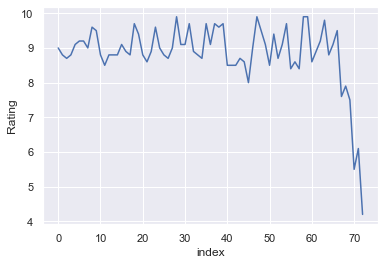

In [192]:
#ploting the index vs rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="index", y="Rating",
legend="full", data=df);